<a href="https://colab.research.google.com/github/paraxioms/NotebookStored/blob/main/Coursework_DataMining_Ass1_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assesment 1 - Task 2

To save time/space and to avoid repition we have combined the code and the report into this notebook. The markdown cells contain the text previously in the report.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from keras.optimizers import Adam

I am using Google Colab for this part of the assignment. Note: I have moved all Ambient_Living data files to a folder named "dataset". To run the data this will have to be done, or the path name below should be changed.

In [ ]:
#A lot of the following code is taken from practical 5
path = '/content/dataset/Ambient_Living_'

sequences = []
fullData = []

for i in range(1,217):
    file_path = path + str(i) + '.csv'
    #print(file_path)
    df = pd.read_csv(file_path, header=0)
    values = df.values
    sequences.append(values)
    fullData.append(df)

fullDataframe = pd.concat(fullData, axis=0)

The pathname for the targets may also need to be changed

In [ ]:
targets = pd.read_csv('/content/dataset/Ambient_Living_target.csv')
targetClass = targets.values[:,1]

There are a total of 4 features, each representing the value of the sensor.

In [ ]:
fullDataframe.columns

Index(['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4'], dtype='object')

In [ ]:
targets.columns

Index(['#sequence_ID', ' class_label'], dtype='object')

In [ ]:
targets.head()

,#sequence_ID,class_label
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


There are a total of 2 classes, the classes -1 and 1. The class -1 has 111 members and the class 1 has 105 members.

In [ ]:
targets[' class_label'].value_counts()

-1    111
 1    105
Name:  class_label, dtype: int64

In [ ]:
targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   #sequence_ID  216 non-null    int64
 1    class_label  216 non-null    int64
dtypes: int64(2)
memory usage: 3.5 KB


A total of 8080 measurements have been taken, across the 216 different sequences. No missing values are present in the data.

In [ ]:
fullDataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8080 entries, 0 to 44
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sensor 1  8080 non-null   float64
 1   Sensor 2  8080 non-null   float64
 2   Sensor 3  8080 non-null   float64
 3   Sensor 4  8080 non-null   float64
dtypes: float64(4)
memory usage: 315.6 KB


### Basic EDA

In [ ]:
missing = fullDataframe.isnull().sum()
missing_data = pd.concat([missing], axis=1, keys=['Missing Values'])
missing_data

,Missing Values
Sensor 1,0
Sensor 2,0
Sensor 3,0
Sensor 4,0


The distributions of the sensor values are shown below: 

In [ ]:
fullDataframe.describe()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4
count,8080.000000,8080.000000,8080.000000,8080.000000
mean,-0.078667,-0.122319,-0.172958,-0.106438
std,0.474131,0.448930,0.497846,0.445637
min,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.454550,-0.466670,-0.590910,-0.446810
50%,-0.045455,-0.155560,-0.155560,-0.100000
75%,0.285710,0.200000,0.142860,0.200000
max,1.000000,1.000000,1.000000,1.000000


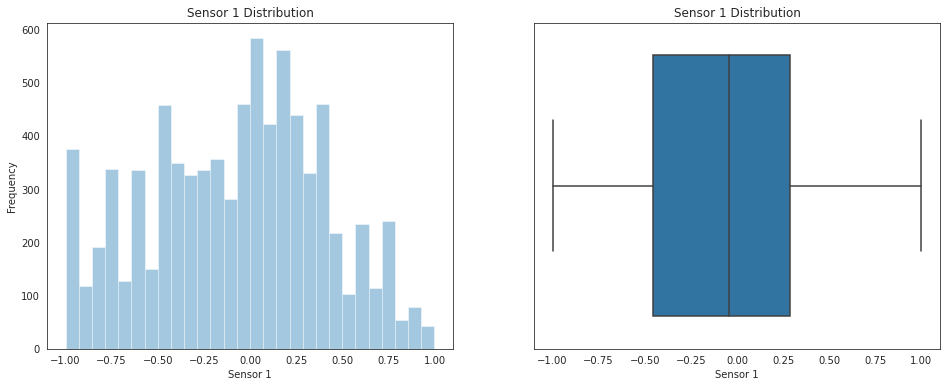

In [ ]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
fig, saxis = plt.subplots(1, 2,figsize=(16,6))
saxis[0].set(xlabel = 'Height',ylabel='Frequency',title="Sensor 1 Distribution")
saxis[1].set(xlabel = 'Height', title="Sensor 1 Distribution")
sns.distplot(fullDataframe['Sensor 1'], kde=False, ax=saxis[0]);
sns.boxplot(fullDataframe['Sensor 1'], ax=saxis[1]);

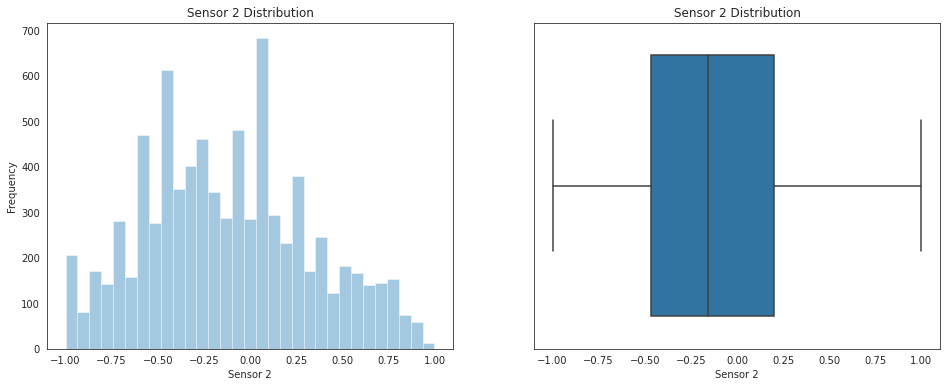

In [ ]:
fig, saxis = plt.subplots(1, 2,figsize=(16,6))
saxis[0].set(xlabel = 'Height',ylabel='Frequency',title="Sensor 2 Distribution")
saxis[1].set(xlabel = 'Height', title="Sensor 2 Distribution")
sns.distplot(fullDataframe['Sensor 2'], kde=False, ax=saxis[0]);
sns.boxplot(fullDataframe['Sensor 2'], ax=saxis[1]);

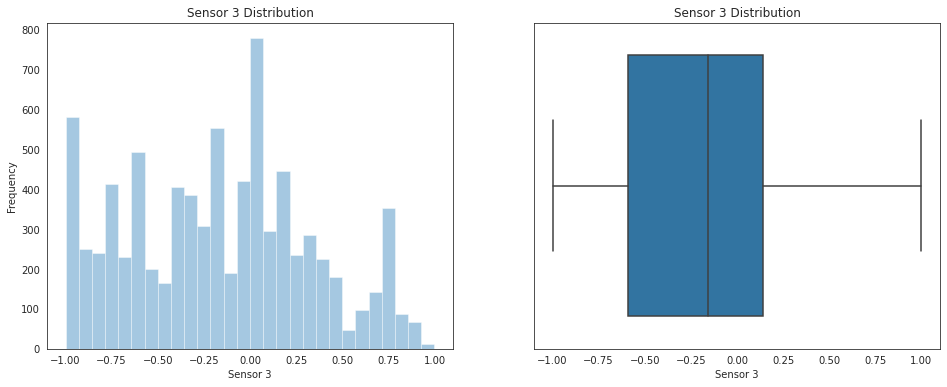

In [ ]:
fig, saxis = plt.subplots(1, 2,figsize=(16,6))
saxis[0].set(xlabel = 'Height',ylabel='Frequency',title="Sensor 3 Distribution")
saxis[1].set(xlabel = 'Height', title="Sensor 3 Distribution")
sns.distplot(fullDataframe['Sensor 3'], kde=False, ax=saxis[0]);
sns.boxplot(fullDataframe['Sensor 3'], ax=saxis[1]);

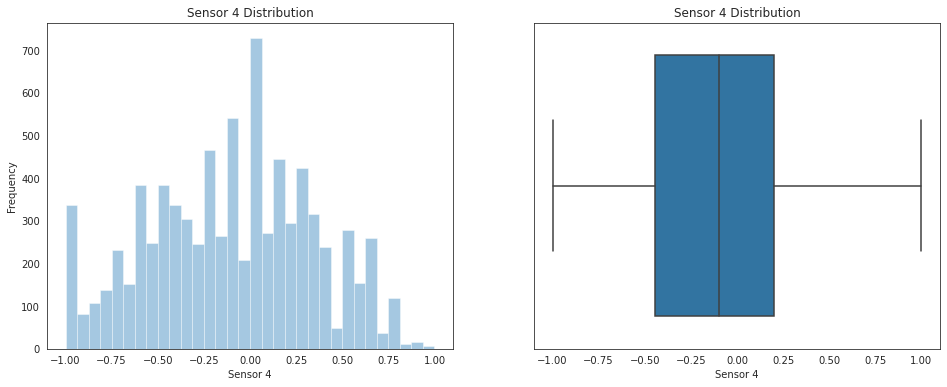

In [ ]:
fig, saxis = plt.subplots(1, 2,figsize=(16,6))
saxis[0].set(xlabel = 'Height',ylabel='Frequency',title="Sensor 4 Distribution")
saxis[1].set(xlabel = 'Height', title="Sensor 4 Distribution")
sns.distplot(fullDataframe['Sensor 4'], kde=False, ax=saxis[0]);
sns.boxplot(fullDataframe['Sensor 4'], ax=saxis[1]);

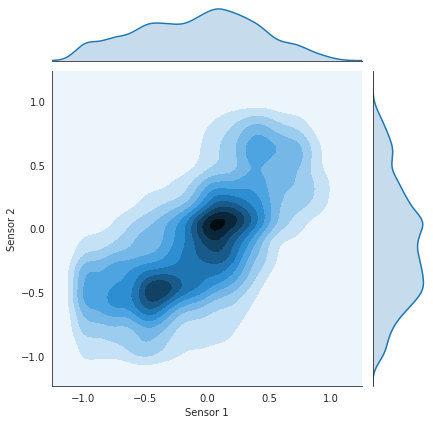

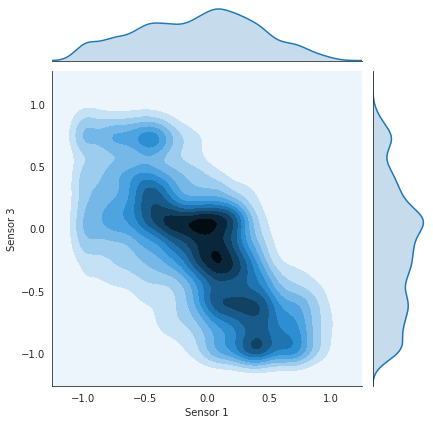

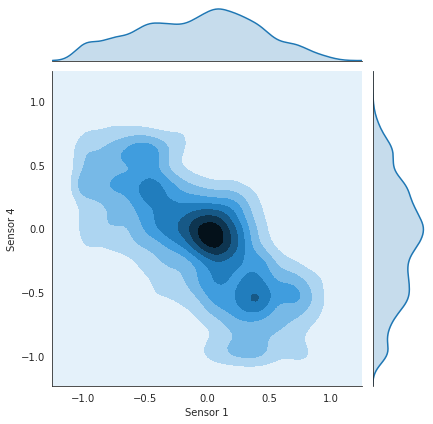

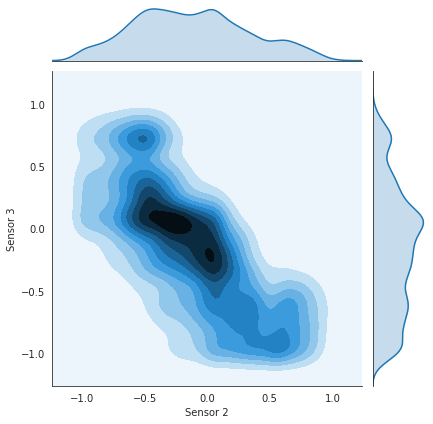

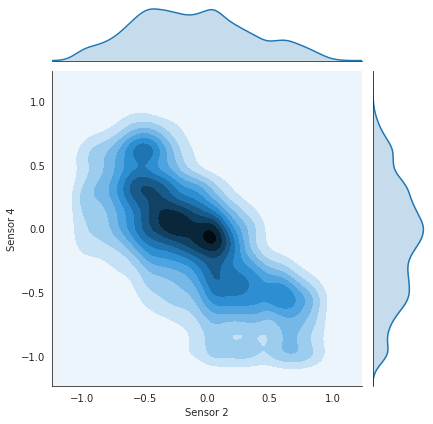

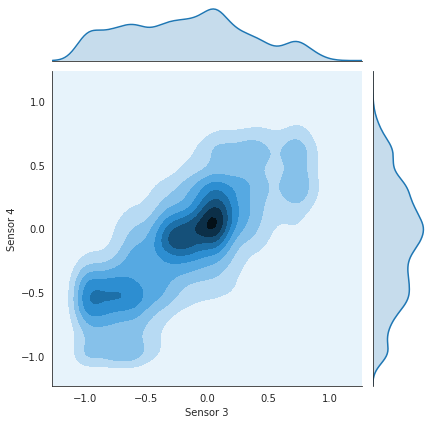

In [ ]:
sns.jointplot(x=fullDataframe['Sensor 1'], y=fullDataframe['Sensor 2'], kind="kde")
sns.jointplot(x=fullDataframe['Sensor 1'], y=fullDataframe['Sensor 3'], kind="kde")
sns.jointplot(x=fullDataframe['Sensor 1'], y=fullDataframe['Sensor 4'], kind="kde")
sns.jointplot(x=fullDataframe['Sensor 2'], y=fullDataframe['Sensor 3'], kind="kde")
sns.jointplot(x=fullDataframe['Sensor 2'], y=fullDataframe['Sensor 4'], kind="kde")
sns.jointplot(x=fullDataframe['Sensor 3'], y=fullDataframe['Sensor 4'], kind="kde")

There is a relatively high correlation between sensor 1 and sensor 2. As well as between sensor 3 and sensor 4.

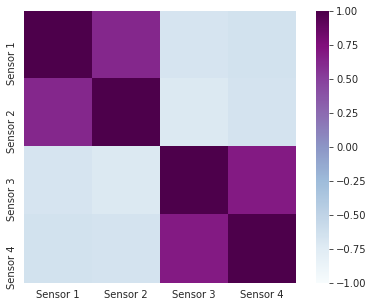

In [ ]:
corrmat = fullDataframe.corr()
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(corrmat, vmax=1, vmin=-1, square=True, cmap="BuPu");

### Preprocessing

An exampel sequences is given below, showing the results of the 4 sensors for a sequence of measurements.

In [ ]:
sequences[0]

array([[-0.90476 , -0.48    ,  0.28571 ,  0.3     ],
       [-0.57143 , -0.32    ,  0.14286 ,  0.3     ],
       [-0.38095 , -0.28    , -0.14286 ,  0.35    ],
       [-0.28571 , -0.2     , -0.47619 ,  0.35    ],
       [-0.14286 , -0.2     ,  0.14286 , -0.2     ],
       [-0.14286 , -0.2     ,  0.047619,  0.      ],
       [-0.14286 , -0.16    , -0.38095 ,  0.2     ],
       [-0.14286 , -0.04    , -0.61905 , -0.2     ],
       [-0.095238, -0.08    ,  0.14286 , -0.55    ],
       [-0.047619,  0.04    , -0.095238,  0.05    ],
       [-0.19048 , -0.04    ,  0.095238,  0.4     ],
       [-0.095238, -0.04    , -0.14286 ,  0.35    ],
       [-0.33333 , -0.08    , -0.28571 , -0.2     ],
       [-0.2381  ,  0.04    ,  0.14286 ,  0.35    ],
       [ 0.      ,  0.08    ,  0.14286 ,  0.05    ],
       [-0.095238,  0.04    ,  0.095238,  0.1     ],
       [-0.14286 , -0.2     ,  0.14286 ,  0.5     ],
       [-0.19048 ,  0.04    , -0.42857 ,  0.3     ],
       [-0.14286 , -0.08    , -0.2381  ,  0.15

In [ ]:
len_sequences = []
for one_seq in sequences:
    len_sequences.append(len(one_seq))
pd.Series(len_sequences).describe([0.2,0.5,0.8])

count    216.000000
mean      37.407407
std       14.948306
min       19.000000
20%       24.000000
50%       33.500000
80%       54.000000
max      103.000000
dtype: float64

We wish to use the 80th percentile for the length of the sequence we use. Therefore we use sequences lengths of 54, padding with 0's sequences below that length and cropping sequences above that length, as descirbed in the assessment task.

In [ ]:
#Padding the sequence with the values in last row to max length
to_pad = 54
new_seq = []
for one_seq in sequences:
    if len(one_seq) < to_pad:
      n = to_pad - len(one_seq)
      to_concat = np.zeros((n,4))
      new_one_seq = np.concatenate([one_seq, to_concat])
    #if len(one_seq) > to_pad:
    #  new_one_seq = one_seq[0:to_pad]
    new_seq.append(new_one_seq)
final_seq = np.stack(new_seq)

seq_len = 54
final_seq = sequence.pad_sequences(final_seq, maxlen=seq_len, padding='post', dtype='float', truncating='post')

In [ ]:
print(len(final_seq))
for i in final_seq[0:10]:
  print(len(i))

216
54
54
54
54
54
54
54
54
54
54


In [ ]:
#final_seq

In [ ]:
X_train = [final_seq[i] for i in range(0,216)] # We dont have a test set, we we using all the data for training
X_train = X_train = np.array(X_train)


y_train = train_target = [targetClass[i] for i in range(0,216)]
y_train = np.array(y_train)
y_train = (y_train+1)/2 #change to  1 and 0 instead of -1 and 1

### Model and Evaluation

We implement 10 fold cross validation by making use of SKLearn. Cross validation allows us to evaluate our models on data our model has not seen. It's advantageous to non-cross validation evaluation as it makes better use of all the data to train the model and gives a more accurate representation of model performance by averaging.

In 10 fold cross validation we split the data into 10 sets, the model is then training and evaluated 10 times, each time withholding 1 different set to use to evaluate the model, and using the other 9 partitions to train the model.

I did not think it neceassary to use a stratisfied K-fold as the classes are already pretty balanced.


In [ ]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

We are implementing a LSTM (Long Short Term Memory) model. A LSTM model is a type of RNN (Reccurent Neural Network) which is better at making use of previous information to make a decision meaning they can hold on to information or patterns that they saw in the data a long time ago. This is particularly useful for time series data and for making future predictions. This makes it a good choice for our sequential data, as it can make use of patterns in the data that other classification models would miss. 

We have implemented our LSTM model below, we have experimented with the different number of layers and the number of units in each, when running the experiments we were weighing up whether the increases performance in adding more layers/units is worth the penalty to the time that the algorithm takes to run. This is particular important as we are using 10-fold cross validation where the model is trained and evaluated 10 times, which can be very time consuming. It is not really our aim here to maximise the performance, if so we would have used more layers with more units and run more epochs, we are aiming to get a decently good model which can be run multiple times without taking too long so we can easily conduct experiments.

Below is the basic baseline model I have used 

In [ ]:
def evaluateModel(learningRate=0.0005, UnitsPerLayer = 128, numberOfLayers = 2, verboseStatus = 1):
  accuracies = []
  f1Scores = []
  foldNumber = 0
  for train, test in kf.split(X_train, y_train):
    foldNumber = foldNumber + 1
    print("Fold Number: ", foldNumber)
    model = Sequential()
    model.add(LSTM(UnitsPerLayer,  return_sequences = True, input_shape=(seq_len, 4)))#256
    #model.add(Dropout(0.2))
    #model.add(LSTM(56, return_sequences=True))
    #model.add(Dense(1, activation='sigmoid'))
    #model.add(LSTM(56, return_sequences=True))
    #model.add(Dense(1, activation='sigmoid'))
    model.add(LSTM(UnitsPerLayer))
    model.add(Dense(1, activation='sigmoid'))

    adam = Adam(lr=learningRate, beta_1=0.9, beta_2=0.99)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

    mod=model.fit(X_train[train], y_train[train],validation_data=(X_train[test], y_train[test]), epochs=100, batch_size=128 ,verbose=verboseStatus, use_multiprocessing=True, workers=-1)

    test_preds = model.predict_classes(X_train[test])
    #print(test_preds)
    #print(y_train[test])
    Accuracy = accuracy_score(y_train[test], test_preds)
    f1 = f1_score(y_train[test], test_preds)
    f1Scores.append(f1)
    accuracies.append(Accuracy)
    print("Accuracy:", Accuracy)
    print("F1:", f1)
  print("Mean Accuracy: ", np.mean(accuracies) )
  print("Mean F1 Score: ", np.mean(f1Scores))
  return np.mean(accuracies), np.mean(f1Scores)

evaluateModel()


Fold Number:  1
Train on 194 samples, validate on 22 samples
Epoch 1/100
194/194 [==============================] - 2s 9ms/step - loss: 0.6921 - accuracy: 0.4227 - val_loss: 0.6964 - val_accuracy: 0.2273
Epoch 2/100
194/194 [==============================] - 1s 4ms/step - loss: 0.6858 - accuracy: 0.4948 - val_loss: 0.7008 - val_accuracy: 0.2273
Epoch 3/100
194/194 [==============================] - 1s 4ms/step - loss: 0.6804 - accuracy: 0.5309 - val_loss: 0.7034 - val_accuracy: 0.2727
Epoch 4/100
194/194 [==============================] - 1s 4ms/step - loss: 0.6730 - accuracy: 0.5515 - val_loss: 0.7034 - val_accuracy: 0.3182
Epoch 5/100
194/194 [==============================] - 1s 4ms/step - loss: 0.6671 - accuracy: 0.5464 - val_loss: 0.7023 - val_accuracy: 0.3182
Epoch 6/100
194/194 [==============================] - 1s 4ms/step - loss: 0.6604 - accuracy: 0.5515 - val_loss: 0.6908 - val_accuracy: 0.3182
Epoch 7/100
194/194 [==============================] - 1s 4ms/step - loss: 0.6517

(0.8893939393939394, 0.8856301323948383)

In [ ]:
#Mean Accuracy:  0.9214285714285715
#Mean F1 ScoreL  0.9136740756426356

Investigating Learning Rates

In [ ]:
learningRates = [0.001, 0.0005, 0.0001]
learningAccuracies = []
learningF1 = []
for learnR in learningRates:
  print("\n Learning Rate:", learnR)
  ac,f1 = evaluateModel(learningRate=learnR, UnitsPerLayer = 128, numberOfLayers = 2,verboseStatus=0)
  learningAccuracies.append(ac)
  learningF1.append(f1)


 Learning Rate: 0.001
Fold Number:  1
Accuracy: 0.9090909090909091
F1: 0.9230769230769231
Fold Number:  2
Accuracy: 0.8636363636363636
F1: 0.896551724137931
Fold Number:  3
Accuracy: 0.7727272727272727
F1: 0.7058823529411765
Fold Number:  4
Accuracy: 0.8636363636363636
F1: 0.823529411764706
Fold Number:  5
Accuracy: 0.9090909090909091
F1: 0.9166666666666666
Fold Number:  6
Accuracy: 0.8636363636363636
F1: 0.8421052631578948
Fold Number:  7
Accuracy: 0.9523809523809523
F1: 0.9411764705882353
Fold Number:  8
Accuracy: 0.9523809523809523
F1: 0.9655172413793104
Fold Number:  9
Accuracy: 0.8095238095238095
F1: 0.7499999999999999
Fold Number:  10
Accuracy: 0.9047619047619048
F1: 0.923076923076923
Mean Accuracy:  0.88008658008658
Mean F1 Score:  0.8687582976789766

 Learning Rate: 0.0005
Fold Number:  1
Accuracy: 1.0
F1: 1.0
Fold Number:  2
Accuracy: 1.0
F1: 1.0
Fold Number:  3
Accuracy: 0.8181818181818182
F1: 0.7777777777777777
Fold Number:  4
Accuracy: 0.8636363636363636
F1: 0.842105263157

Learning Rate: 0.001

Mean Accuracy:  0.8980519480519481

Mean F1 Score:  0.8867422003284073



Learning Rate: 0.0005


Mean Accuracy:  0.8835497835497836

Mean F1 Score:  0.8832954787778846


Learning Rate: 0.0001

Mean Accuracy:  0.8095238095238095


Mean F1 Score:  0.7901720777038381


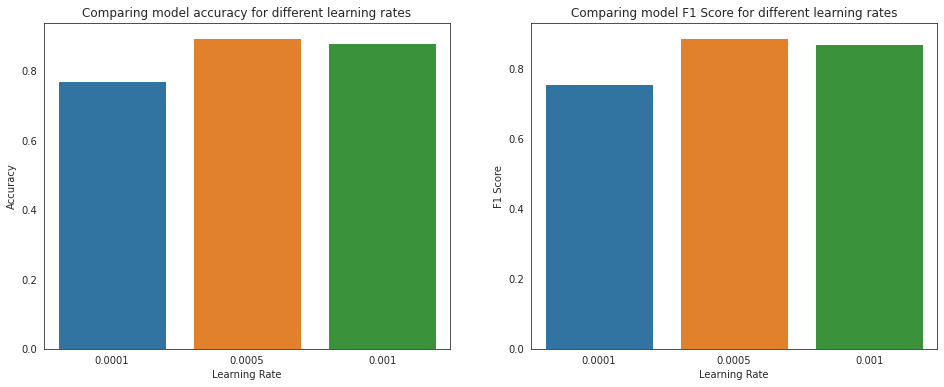

In [ ]:
fig, saxis = plt.subplots(1, 2,figsize=(16,6))
saxis[0].set(xlabel = 'Learning Rate',ylabel='Accuracy',title="Comparing model accuracy for different learning rates")
saxis[1].set(xlabel = 'Learning Rate', ylabel = 'F1 Score', title="Comparing model F1 Score for different learning rates")
sns.barplot(x=learningRates, y=learningAccuracies[0:4], ax=saxis[0])
sns.barplot(x=learningRates, y =learningF1[0:4], ax=saxis[1]);

Investigating Number Of Units In Each Layer

In [ ]:
unitNumbers = [32,64,128,256]
UnitAccuracies = []
UnitF1 = []
for unitNo in unitNumbers:
  print("\n Unit Number:", unitNo)
  ac,f1 = evaluateModel(learningRate=0.0005, UnitsPerLayer = unitNo, numberOfLayers = 2,verboseStatus=0)
  UnitAccuracies.append(ac)
  UnitF1.append(f1)


 Unit Number: 32
Fold Number:  1
Accuracy: 1.0
F1: 1.0
Fold Number:  2
Accuracy: 0.9090909090909091
F1: 0.9285714285714286
Fold Number:  3
Accuracy: 0.7727272727272727
F1: 0.761904761904762
Fold Number:  4
Accuracy: 0.7727272727272727
F1: 0.6666666666666667
Fold Number:  5
Accuracy: 0.8636363636363636
F1: 0.8695652173913043
Fold Number:  6
Accuracy: 0.8181818181818182
F1: 0.7999999999999999
Fold Number:  7
Accuracy: 0.7619047619047619
F1: 0.7368421052631579
Fold Number:  8
Accuracy: 0.9047619047619048
F1: 0.9333333333333333
Fold Number:  9
Accuracy: 0.8095238095238095
F1: 0.7499999999999999
Fold Number:  10
Accuracy: 0.9047619047619048
F1: 0.923076923076923
Mean Accuracy:  0.8517316017316017
Mean F1 Score:  0.8369960436207575

 Unit Number: 64
Fold Number:  1
Accuracy: 0.9090909090909091
F1: 0.9285714285714286
Fold Number:  2
Accuracy: 0.7727272727272727
F1: 0.8148148148148148
Fold Number:  3
Accuracy: 0.9090909090909091
F1: 0.875
Fold Number:  4
Accuracy: 0.7272727272727273
F1: 0.625

32 Units:
Mean Accuracy:  0.8517316017316017
Mean F1 Score:  0.8369960436207575


64 Units: 
Mean Accuracy:  0.8192640692640693
Mean F1 Score:  0.8063479676523155


128 Units:
Mean Accuracy:  0.8703463203463203
Mean F1 Score:  0.8635400282314982


256 Units:
Mean Accuracy:  0.8616883116883116
Mean F1 Score:  0.8516634109734029



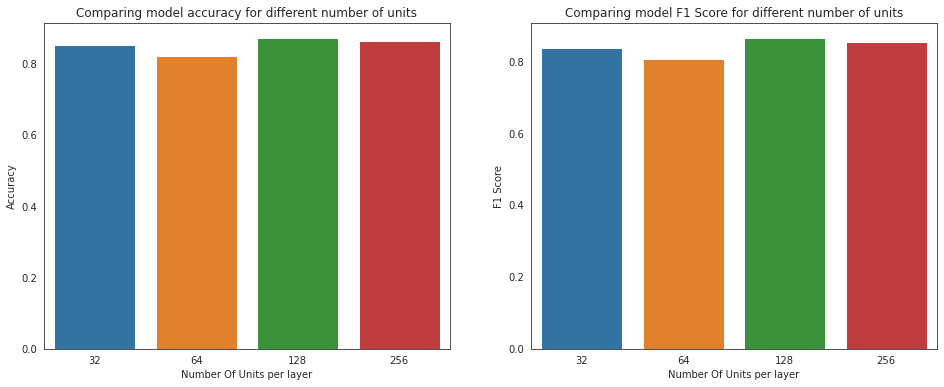

In [ ]:
fig, saxis = plt.subplots(1, 2,figsize=(16,6))
saxis[0].set(xlabel = 'Number Of Units per layer',ylabel='Accuracy',title="Comparing model accuracy for different number of units")
saxis[1].set(xlabel = 'Number Of Units per layer', ylabel = 'F1 Score', title="Comparing model F1 Score for different number of units")
sns.barplot(x=[32,64,128,256], y=UnitAccuracies[0:4], ax=saxis[0])
sns.barplot(x=[32,64,128,256], y =UnitF1[0:4], ax=saxis[1]);

Investigating Number Of Layers

In [ ]:
print("\n 1 Layer \n")

accuracies = []
f1Scores = []
foldNumber = 0
for train, test in kf.split(X_train, y_train):
    foldNumber = foldNumber + 1
    print("Fold Number: ", foldNumber)
    model = Sequential()
    model.add(LSTM(128, input_shape=(seq_len, 4)))#256
    model.add(Dense(1, activation='sigmoid'))

    adam = Adam(lr=0.0005, beta_1=0.9, beta_2=0.99)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

    mod=model.fit(X_train[train], y_train[train],validation_data=(X_train[test], y_train[test]), epochs=100, batch_size=128 ,verbose=0, use_multiprocessing=True, workers=-1)

    test_preds = model.predict_classes(X_train[test])
    #print(test_preds)
    #print(y_train[test])
    Accuracy = accuracy_score(y_train[test], test_preds)
    f1 = f1_score(y_train[test], test_preds)
    f1Scores.append(f1)
    accuracies.append(Accuracy)
    print("Accuracy:", Accuracy)
    print("F1:", f1)
print("Mean Accuracy: ", np.mean(accuracies) )
print("Mean F1 Score: ", np.mean(f1Scores))

print("\n 2 layers \n")
acc_2, f1_2 = evaluateModel(learningRate=0.0005, UnitsPerLayer = 128, numberOfLayers = 2,verboseStatus=0)




 1 Layer 

Fold Number:  1
Accuracy: 0.8636363636363636
F1: 0.8799999999999999
Fold Number:  2
Accuracy: 0.9545454545454546
F1: 0.9655172413793104
Fold Number:  3
Accuracy: 0.7727272727272727
F1: 0.7058823529411765
Fold Number:  4
Accuracy: 0.9545454545454546
F1: 0.9411764705882353
Fold Number:  5
Accuracy: 0.8181818181818182
F1: 0.8181818181818182
Fold Number:  6
Accuracy: 0.8636363636363636
F1: 0.8571428571428571
Fold Number:  7
Accuracy: 0.9047619047619048
F1: 0.875
Fold Number:  8
Accuracy: 0.9047619047619048
F1: 0.9285714285714286
Fold Number:  9
Accuracy: 0.9523809523809523
F1: 0.923076923076923
Fold Number:  10
Accuracy: 0.7619047619047619
F1: 0.8148148148148148
Mean Accuracy:  0.8751082251082252
Mean F1 Score:  0.8709363906696564

 2 layers 

Fold Number:  1
Accuracy: 0.9090909090909091
F1: 0.9285714285714286
Fold Number:  2
Accuracy: 1.0
F1: 1.0
Fold Number:  3
Accuracy: 0.9090909090909091
F1: 0.888888888888889
Fold Number:  4
Accuracy: 0.9545454545454546
F1: 0.94117647058823

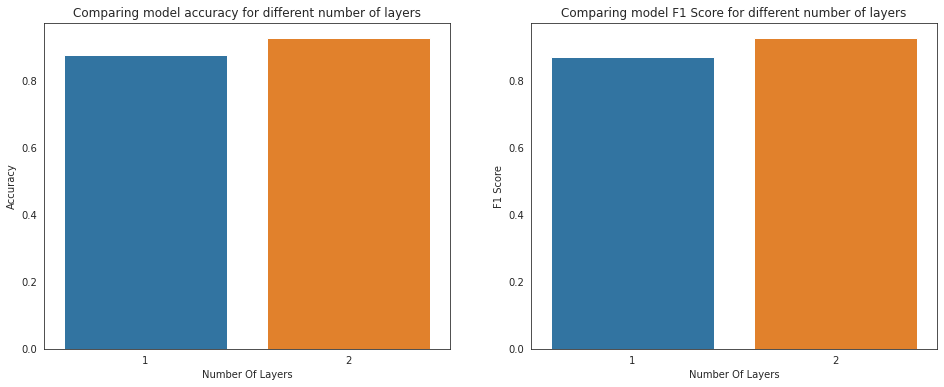

In [ ]:
acc_1 = np.mean(accuracies)
f1_1 = np.mean(f1Scores)
fig, saxis = plt.subplots(1, 2,figsize=(16,6))
saxis[0].set(xlabel = 'Number Of Layers',ylabel='Accuracy',title="Comparing model accuracy for different number of layers")
saxis[1].set(xlabel = 'Number Of Layers', ylabel = 'F1 Score', title="Comparing model F1 Score for different number of layers")
sns.barplot(x=[1,2], y=[acc_1,acc_2], ax=saxis[0])
sns.barplot(x=[1,2], y = [f1_1, f1_2], ax=saxis[1]);

### Subtask 5

We note that there is a lot of randomness, a large part of this is because we are not using the model used for the epoch with the highest validation accuracy as this would be a form of data leakage. Instead we are just using the model from the last epoch by looking at the validation accuracy in each epoch we can see that this changes quite a lot between epochs becuase of the small size of the test data. 

Clearly more experiments need to be done for reliable concludsions to be made. It appears that more layers improve the model performance. More investigation needs to be done to find a perfect learning rate but 0.0005 seems to be a good one. The number of units was particurly interesting and wasn't what I was expecting this could be because of randomness, but 128 units seems to be a good choice. 

Overall its really difficult to make conclusions on this data as there is not enough of it, we need a larger training and test set to make more accurate conclusions.